## Importing Libraries¶

In [3]:
import cv2
import os
from skimage import color, data, io, measure
from skimage.filters import threshold_otsu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
mpl.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.dpi']= 300
plt.rc("savefig", dpi=300)
from tqdm import tqdm

In [4]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = False

    if method == "top-to-bottom" or method == "right-to-left":
        i = 1

    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
        key=lambda b:b[1][i], reverse=reverse))

    return (cnts, boundingBoxes)



In [5]:
def f(y):
    global horizontal_lines_img, verticle_lines_img, kernel
    kernel_length = np.array(img).shape[1]//y

    verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
    hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
    img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=1)
    verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=1)
    cv2.imwrite("verticle_lines.jpg",verticle_lines_img)
    img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=1)
    horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=1)
    plt.imshow(horizontal_lines_img);
    plt.axis('off')

# Numbers of Images


## The images are saved in the folder named as 'img_result'.

100%|██████████| 6/6 [00:29<00:00,  5.62s/it]


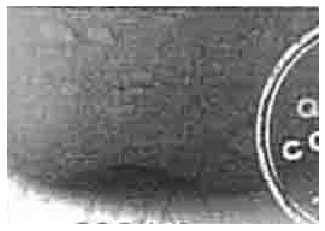

In [6]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
counter = 1
for img_path in tqdm(glob.glob('img/*.jpg')):
    
    img = cv2.imread(img_path,0)
    (thresh, img_bin) = cv2.threshold(img, 240, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
    img_bin = 255-img_bin
    f(255)
    alpha = 0.9
    beta = 1.0 - alpha
    img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.5)
    (thresh, img_final_bin) = cv2.threshold(img_final_bin, 230,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    plt.axis('off')
    plt.imshow(img_final_bin)
    contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Sort all the contours by top to bottom.
    (contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")
    idx = 1
    
    for c in (contours):
        # Returns the location and width,height for every contour
        x, y, w, h = cv2.boundingRect(c)
        
# If the box height is greater then 20, widht is >80, then only save it as a box in "cropped/" folder.
        if (w > 160 and h > 80) and w < 2.5 *h:
            idx += 3
            new_img = img[y:y+h, x:x+w]
            #plt.subplot(2,3, idx)
            plt.imshow(new_img)
            plt.axis('off')
            file_n = img_path.split('/')[-1].split('.')[0]
            
            plt.savefig(f'./img_result/{file_n} _ label{counter}',dpi=300)
            counter+=1


## Extracting text from Nutrition lables

### ---------------

In [7]:
import pytesseract
from PIL import Image, ImageEnhance, ImageFilter
import os
import glob
import re
import sys
import cv2

In [8]:
def writeFile(directory, fileName, content):
    outFile = open('outputs/' + directory + '/' + fileName + '.txt', 'w')
    outFile.write(content)
    outFile.close()

# Setup regex for stripping file names
p = re.compile('[0-9]+.jpg')
    
# Use images in the labels directory
for file in glob.glob('../labels/*.jpg'):
    fileName = p.findall(file)[0]
    print ("Proccessing " + fileName)
    outFileName = fileName[0:len(fileName)-4]
        
    bw = cv2.imread(file, 0)

    # Apply adaptive thresholding to images
    thresh = cv2.adaptiveThreshold(bw, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY, 11, 2)

    # Get text recognition from thresholded images
    output = pytesseract.image_to_string(Image.fromarray(bw))
    writeFile('bw', outFileName, output)

    break

In [9]:
#####

def label_Recognizer(path):
    import re
    import os
    from matplotlib import pyplot 
    files = []
    for  r,d, f in os.walk(path):
        for file in f:
            files.append(os.path.join(file))
    p = re.compile('[0-9]+.jpg')
    all_result = []
    for f in files:
        print(f)

        for file in glob.glob('pd_test/*.jpg'):
            fileName = p.findall(file)[0]
            print ("Proccessing " + fileName)
            outFileName = fileName[0:len(fileName)-4]
            # Get default text recognition 
            output = pytesseract.image_to_string(Image.open(file))
            print("/n/sLABEL", output)
            all_result.append(output)
        result = []
        for i in all_result:
            if len(i) == 0:
                pass
            else:
                result.append(i)
        return result
            


In [18]:
#####

def label_Recognizer(path):
    import re
    import os
    from matplotlib import pyplot 
    files = []
    for  r,d, f in os.walk(path):
        for file in f:
            files.append(os.path.join(file))
    p = re.compile('[0-9]+.jpg')
    all_result = []
    for f in files:
        print(f)
     #   out_dict = end_to_end.end_to_end(f'{path}\{f}')
        #-----------------

        for file in glob.glob('pd_test/*.jpg'):
            fileName = p.findall(file)[0]
            print ("Proccessing " + fileName)
            outFileName = fileName[0:len(fileName)-4]
            # Get default text recognition 
            output = pytesseract.image_to_string(Image.open(file))
            print("/n/sLABEL", output)
            all_result.append(output)
        result = []
        for i in all_result:
            if len(i) == 0:
                pass
            else:
                result.append(i)
        return result
            


In [19]:
n = label_Recognizer('pd_test')

label152.jpg
Proccessing 152.jpg
/n/sLABEL 
Proccessing 386.jpg
/n/sLABEL ition Facts|!INGREDIENTS:
(28g / about 1" cube) | PASTEURIZED PART-SKIM.
out 8 MILK, CHEESE CULTURE,
SALT, ENZYMES

 
   
  
 
  
 

     
 

 

CONTAINS: MILK.

DISTRIBUTED BY
‘9% | CHURNY COMPANY, INC.
WEYAUWEGA, WI54983 USA

Glu eran ie) 0 oF Ug eh INS

1) wh

O27¢

 

fae
KEEP AERIERATD
Proccessing 322.jpg
/n/sLABEL Nutrition Facts
A Amount Per Serving 1oz (289)
A Galories 175 Calories From Fat 125
Total Fat 14g 22%
Saturated Fat 2.19 11%
Trans Fat Og 0%
Cholesterol Omg 0%
Sodium 23mg 1%
Total Carbohydrate 5g 5%
Dietary Fiber 2.79 119
Protein 7g 14%
Calcium 0%
Iron 3%
VitaminA = 0% Vitamin€ = 2%
Calcium 6% Iron 8%
Percent Daily Values are based on - 2000 calories
diet Your Daily value may be higher or lower
depending on your calorie ne

 

 

 

Aug byllg Syballuc bysylarost
Uno egg

KEEP AWAY FROM HEAT , HUMIDITY
AND SUNLIGHT

MIAN

Mn 7260
Proccessing 109.jpg
/n/sLABEL 


In [11]:
import pandas as pd

In [20]:
n

['ition Facts|!INGREDIENTS:\n(28g / about 1" cube) | PASTEURIZED PART-SKIM.\nout 8 MILK, CHEESE CULTURE,\nSALT, ENZYMES\n\n \n   \n  \n \n  \n \n\n     \n \n\n \n\nCONTAINS: MILK.\n\nDISTRIBUTED BY\n‘9% | CHURNY COMPANY, INC.\nWEYAUWEGA, WI54983 USA\n\nGlu eran ie) 0 oF Ug eh INS\n\n1) wh\n\nO27¢\n\n \n\nfae\nKEEP AERIERATD',
 'Nutrition Facts\nA Amount Per Serving 1oz (289)\nA Galories 175 Calories From Fat 125\nTotal Fat 14g 22%\nSaturated Fat 2.19 11%\nTrans Fat Og 0%\nCholesterol Omg 0%\nSodium 23mg 1%\nTotal Carbohydrate 5g 5%\nDietary Fiber 2.79 119\nProtein 7g 14%\nCalcium 0%\nIron 3%\nVitaminA = 0% Vitamin€ = 2%\nCalcium 6% Iron 8%\nPercent Daily Values are based on - 2000 calories\ndiet Your Daily value may be higher or lower\ndepending on your calorie ne\n\n \n\n \n\n \n\nAug byllg Syballuc bysylarost\nUno egg\n\nKEEP AWAY FROM HEAT , HUMIDITY\nAND SUNLIGHT\n\nMIAN\n\nMn 7260']

In [ ]:
if 'Nutrition Facts' in n:
    n

In [ ]:
n.split('\n')

In [15]:
m = label_Recognizer('pd_test')

label152.jpg
Proccessing 152.jpg
/n/sLABEL 
Proccessing 386.jpg
/n/sLABEL ition Facts|!INGREDIENTS:
(28g / about 1" cube) | PASTEURIZED PART-SKIM.
out 8 MILK, CHEESE CULTURE,
SALT, ENZYMES

 
   
  
 
  
 

     
 

 

CONTAINS: MILK.

DISTRIBUTED BY
‘9% | CHURNY COMPANY, INC.
WEYAUWEGA, WI54983 USA

Glu eran ie) 0 oF Ug eh INS

1) wh

O27¢

 

fae
KEEP AERIERATD
Proccessing 322.jpg
/n/sLABEL Nutrition Facts
A Amount Per Serving 1oz (289)
A Galories 175 Calories From Fat 125
Total Fat 14g 22%
Saturated Fat 2.19 11%
Trans Fat Og 0%
Cholesterol Omg 0%
Sodium 23mg 1%
Total Carbohydrate 5g 5%
Dietary Fiber 2.79 119
Protein 7g 14%
Calcium 0%
Iron 3%
VitaminA = 0% Vitamin€ = 2%
Calcium 6% Iron 8%
Percent Daily Values are based on - 2000 calories
diet Your Daily value may be higher or lower
depending on your calorie ne

 

 

 

Aug byllg Syballuc bysylarost
Uno egg

KEEP AWAY FROM HEAT , HUMIDITY
AND SUNLIGHT

MIAN

Mn 7260
Proccessing 109.jpg
/n/sLABEL 


In [21]:
m[2]

'Nutrition Facts\nA Amount Per Serving 1oz (289)\nA Galories 175 Calories From Fat 125\nTotal Fat 14g 22%\nSaturated Fat 2.19 11%\nTrans Fat Og 0%\nCholesterol Omg 0%\nSodium 23mg 1%\nTotal Carbohydrate 5g 5%\nDietary Fiber 2.79 119\nProtein 7g 14%\nCalcium 0%\nIron 3%\nVitaminA = 0% Vitamin€ = 2%\nCalcium 6% Iron 8%\nPercent Daily Values are based on - 2000 calories\ndiet Your Daily value may be higher or lower\ndepending on your calorie ne\n\n \n\n \n\n \n\nAug byllg Syballuc bysylarost\nUno egg\n\nKEEP AWAY FROM HEAT , HUMIDITY\nAND SUNLIGHT\n\nMIAN\n\nMn 7260'

### -------------------

### All_Labels:

## Referenced_code

### image view

### Text with Tesseract - codes:

In [ ]:

import pytesseract
from PIL import Image, ImageEnhance, ImageFilter

im = Image.open("test_result.png") # the second one 
im = im.filter(ImageFilter.MedianFilter())
enhancer = ImageEnhance.Contrast(im)
im = enhancer.enhance(22)
im = im.convert('1')
im.save('test2.jpg')

text = pytesseract.image_to_string(Image.open('test2.jpg'))
print(text)

#### Method 2

In [ ]:
# A seconde way to extract text - OCR 
import os
import tempfile
import subprocess

def ocr(path):
    temp = tempfile.NamedTemporaryFile(delete=False)

    process = subprocess.Popen(['tesseract', path, temp.name], stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    process.communicate()

    with open(temp.name + '.txt', 'r') as handle:
        contents = handle.read()

    os.remove(temp.name + '.txt')
    os.remove(temp.name)

    return contents

str = ocr('test_result.png')
print(str)

In [52]:
img = cv2.imread('img/product_5.jpg',0)

In [53]:
idx = 0
boxes = []
for c in contours:
    # Returns the location and width,height for every contour
    x, y, w, h = cv2.boundingRect(c)
    if (w > 80 and h > 20) and w > 3*h:
        idx += 1
        boxes.append(img[y:y+h, x:x+w])
# If the box height is greater then 20, widht is >80, then only save it as a box in "cropped/" folder.
    if (w > 80 and h > 20) and w > 3*h:
        idx += 1
        boxes.append(img[y:y+h, x:x+w])
        idx = 0
boxes = []
for c in contours:
    # Returns the location and width,height for every contour
    x, y, w, h = cv2.boundingRect(c)
    if (w > 80 and h > 20) and w > 3*h:
        idx += 1
        boxes.append(img[y:y+h, x:x+w])
# If the box height is greater then 20, widht is >80, then only save it as a box in "cropped/" folder.
    if (w > 80 and h > 20) and w > 3*h:
        idx += 1
        boxes.append(img[y:y+h, x:x+w])